<a href="https://colab.research.google.com/github/arman690/linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [51]:
# Initialize empty NumPy arrays for x_train and y_train
x_train = np.array([])
y_train = np.array([])

# Open the .txt file and read its content
with open('/content/ex1data1.txt', 'r') as file:
    # Read each line in the file
    for line in file.readlines():
        # Split the line by comma and convert values to float
        x, y = map(float, line.strip().split(','))

        # Append values to respective NumPy arrays
        x_train = np.append(x_train, x)
        y_train = np.append(y_train, y)


In [52]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [53]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [54]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


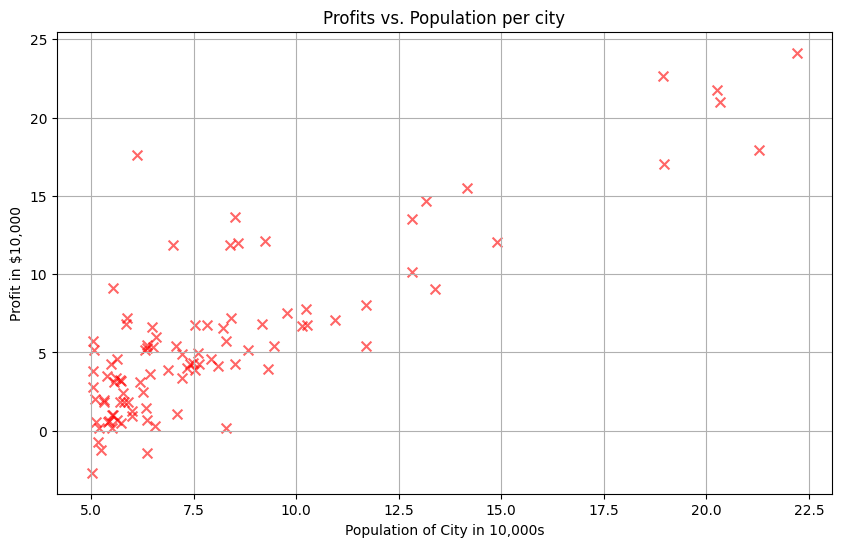

In [55]:

# Assuming you have already loaded the data into x_train and y_train

# Create a scatter plot with red 'x' markers
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, marker='x', c='r', s=50, alpha=0.6, label='Data Points')

# Add a title and labels
plt.title("Profits vs. Population per city")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

# Optionally, add a grid, legend, and other elements
plt.grid(True)
# plt.legend()  # Uncomment if you have multiple elements in the plot

# If you have regression coefficients, you can plot a regression line
# plt.plot(x_train, theta0 + theta1 * x_train, color='blue', label='Regression Line')

# Show the plot
plt.show()


In [56]:

# Function to compute cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        # Compute squared error and sum
        fwb = w * x[i] + b
        cost = (fwb - y[i])**2
        cost_sum += cost
    total_cost = cost_sum * (1 / (2 * m))
    return total_cost

In [67]:
# Function to compute gradients
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    djwb_b = 0
    djwb_w = 0
    for i in range(m):
        # Compute gradients
        fwb = w * x[i] + b
        djwb = fwb - y[i]
        djww = (fwb - y[i]) * x[i]
        djwb_b += djwb
        djwb_w += djww
    djwb_b /= m
    djwb_w /= m
    return djwb_w, djwb_b

In [71]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
  # number of training examples
  m = len(x)

  # An array to store cost J and w's at each iteration — primarily for graphing later
  J_history = []
  w_history = []
  w = copy.deepcopy(w_in)  #avoid modifying global w within function
  b = b_in

  for i in range(num_iters):

      # Calculate the gradient and update the parameters
      dj_dw, dj_db = gradient_function(x, y, w, b )

      # Update Parameters using w, b, alpha and gradient
      w = w - alpha * dj_dw
      b = b - alpha * dj_db

      # Save cost J at each iteration
      if i<100000:      # prevent resource exhaustion
          cost =  cost_function(x, y, w, b)
          J_history.append(cost)

      # Print cost every at intervals 10 times or as many iterations if < 10
      if i% math.ceil(num_iters/10) == 0:
          w_history.append(w)
          print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

  return w, b, J_history, w_history #return w and J,w history for graphing


In [74]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradiant, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [75]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

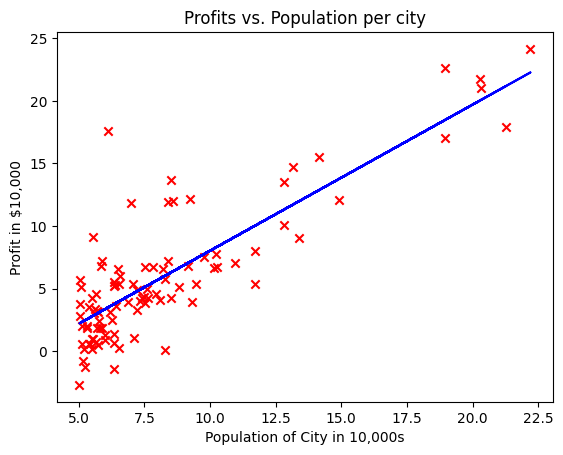

In [76]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [77]:
# Make predictions for specific populations
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1 * 10000))
predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2 * 10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
